In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
path_principal = r"C:\Users\josep\OneDrive\Escritorio\Proyectos-Junior\DataSet-Kaggle\Proyecto-4-Automobile\ZIP\automobile\imports-85.data"

In [74]:
columnas = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_of_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_of_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower",
    "peak_rpm", "city_mpg", "highway_mpg", "price"
]

In [75]:
df_principal = pd.read_csv(path_principal, names=columnas, na_values="?")
df_principal.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## 🚀 Plan de trabajo para analizar el impacto de características en el precio del vehículo

# Identificacion de variables
1. price
2. engine-type
3. num-of-cylinders
4. city-mpg
5. highway-mpg

In [76]:
print(df_principal[['price', 'engine_type', 'num_of_cylinders', 'city_mpg', 'highway_mpg']].isnull().sum())


price               4
engine_type         0
num_of_cylinders    0
city_mpg            0
highway_mpg         0
dtype: int64


In [77]:
df_principal['num_of_cylinders'].head()

0    four
1    four
2     six
3    four
4    five
Name: num_of_cylinders, dtype: object

Identifiacion faltante en la columna de 'price', en el cual como es int, se utilizara las Q1-Q3 para rectificar si hay outiler que puede afectar su reemplazo y no eliminar datos 

In [78]:
# 1. calculo de datos eliminados
total_filas = len(df_principal)
nulos = df_principal['price'].isnull().sum() 
no_nulos = df_principal['price'].notnull().sum() 
# Calcular los porcentajes 
porcentaje_nulos = (nulos / total_filas) * 100 
porcentaje_no_nulos = (no_nulos / total_filas) * 100
 
# Mostrar resultados 
print(f"Total de filas: {total_filas}") 
print(f"Nulos: {nulos} ({porcentaje_nulos:.2f}%)") 
print(f"No nulos: {no_nulos} ({porcentaje_no_nulos:.2f}%)")

Total de filas: 205
Nulos: 4 (1.95%)
No nulos: 201 (98.05%)


In [79]:
# 2. Calculo de cuartiles 
# Calcular Q1, Q3 y IQR
Q1 = df_principal['price'].quantile(0.25)
Q3 = df_principal['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_principal[(df_principal['price'] < limite_inferior) | (df_principal['price'] > limite_superior)]
print("Outliers encontrados:\n")
outliers

Outliers encontrados:



,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,NaN,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


In [80]:
# 3 definir media o mediana dependiendo los cuartiles
# Decidir si usar media o mediana
if len(outliers) > 0:
    print("Hay outliers, mejor usar la MEDIANA:", df_principal['price'].median())
else:
    print("No hay outliers, podemos usar la MEDIA:", df_principal['price'].mean())

Hay outliers, mejor usar la MEDIANA: 10295.0


In [81]:
# 4. Reemplazo de Mediana
df_principal['price'].fillna(df_principal['price'].median(), inplace=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_14208\2402689965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_principal['price'].fillna(df_principal['price'].median(), inplace=True)


In [82]:
print(df_principal[['price', 'engine_type', 'num_of_cylinders', 'city_mpg', 'highway_mpg']].isnull().sum())


price               0
engine_type         0
num_of_cylinders    0
city_mpg            0
highway_mpg         0
dtype: int64


## 🚀 Paso 2: Conversión de Variables Categóricas a Numéricas

In [83]:
print(df_principal[['price', 'engine_type', 'num_of_cylinders', 'city_mpg', 'highway_mpg']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             205 non-null    float64
 1   engine_type       205 non-null    object 
 2   num_of_cylinders  205 non-null    object 
 3   city_mpg          205 non-null    int64  
 4   highway_mpg       205 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 8.1+ KB
None


# Columnas categoricas
1.  engine_type       205 non-null    object 
2.  num_of_cylinders  205 non-null    object 

In [84]:
repeticiones_engine = df_principal['engine_type'].value_counts()
valores_unicos_engine = df_principal['engine_type'].unique()

print(repeticiones_engine, valores_unicos_engine)

engine_type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64 ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [85]:
repeticiones_num_cilindrer = df_principal['num_of_cylinders'].unique()
valores_unicos_num_cilindrer = df_principal['num_of_cylinders'].value_counts()
print(repeticiones_num_cilindrer, valores_unicos_num_cilindrer)

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] num_of_cylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


In [86]:
# Creacion de data frame para agrgar valores de columnas limpios
df_onequestion = pd.DataFrame()

In [87]:
marcas = df_principal['make']

df_onequestion = pd.concat([df_onequestion, marcas], axis=1)

# El orden lógico es el siguiente:
two < three < four < five < six < eight < twelve < sixteen

Usamos map() para asignar valores numéricos:

In [88]:
cylinder_mapping = {
    'two': 0,
    'three': 1,
    'four': 2,
    'five': 3,
    'six': 4,
    'eight': 5,
    'twelve': 6,
    'sixteen': 7
}

In [89]:
num_cilinder_encode = df_principal['num_of_cylinders'].map(cylinder_mapping)
df_onequestion = pd.concat([df_onequestion, num_cilinder_encode], axis=1)
df_onequestion


,make,num_of_cylinders
0,alfa-romero,2
1,alfa-romero,2
2,alfa-romero,4
3,audi,2
4,audi,3
...,...,...
200,volvo,2
201,volvo,2
202,volvo,4
203,volvo,4


In [90]:
# Aplicamos One-Hot Encoding solo a 'engine_type' pero sin modificar todo el DataFrame
dummies = pd.get_dummies(df_principal['engine_type'], prefix='engine_type', drop_first=True)

# Agregamos solo las columnas dummy al DataFrame df_onequestion
df_onequestion = pd.concat([df_onequestion, dummies], axis=1)
df_onequestion

,make,num_of_cylinders,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
0,alfa-romero,2,False,False,False,False,False,False
1,alfa-romero,2,False,False,False,False,False,False
2,alfa-romero,4,False,False,False,False,True,False
3,audi,2,False,False,True,False,False,False
4,audi,3,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
200,volvo,2,False,False,True,False,False,False
201,volvo,2,False,False,True,False,False,False
202,volvo,4,False,False,False,False,True,False
203,volvo,4,False,False,True,False,False,False


In [91]:
#Agregaro Columnas Al dataframe
price = df_principal['price']

df_onequestion = pd.concat([df_onequestion, price], axis=1) 

In [92]:
citympg = df_principal['city_mpg']
higmpg = df_principal['highway_mpg']

df_onequestion = pd.concat([df_onequestion, citympg], axis=1)
df_onequestion = pd.concat([df_onequestion, higmpg], axis=1)
df_onequestion

,make,num_of_cylinders,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,price,city_mpg,highway_mpg
0,alfa-romero,2,False,False,False,False,False,False,13495.0,21,27
1,alfa-romero,2,False,False,False,False,False,False,16500.0,21,27
2,alfa-romero,4,False,False,False,False,True,False,16500.0,19,26
3,audi,2,False,False,True,False,False,False,13950.0,24,30
4,audi,3,False,False,True,False,False,False,17450.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,2,False,False,True,False,False,False,16845.0,23,28
201,volvo,2,False,False,True,False,False,False,19045.0,19,25
202,volvo,4,False,False,False,False,True,False,21485.0,18,23
203,volvo,4,False,False,True,False,False,False,22470.0,26,27


## 3️⃣ Detección y tratamiento de outliers (valores atípicos)

📌 Procedimiento para detectar y tratar outliers
1️⃣ Identificar outliers en variables numéricas usando el método IQR (Interquartile Range).

2️⃣ Visualizarlos con gráficos como boxplots para confirmar su presencia.

3️⃣ Decidir qué hacer:

Eliminarlos si son errores claros.
Transformarlos o imputarlos si son relevantes.

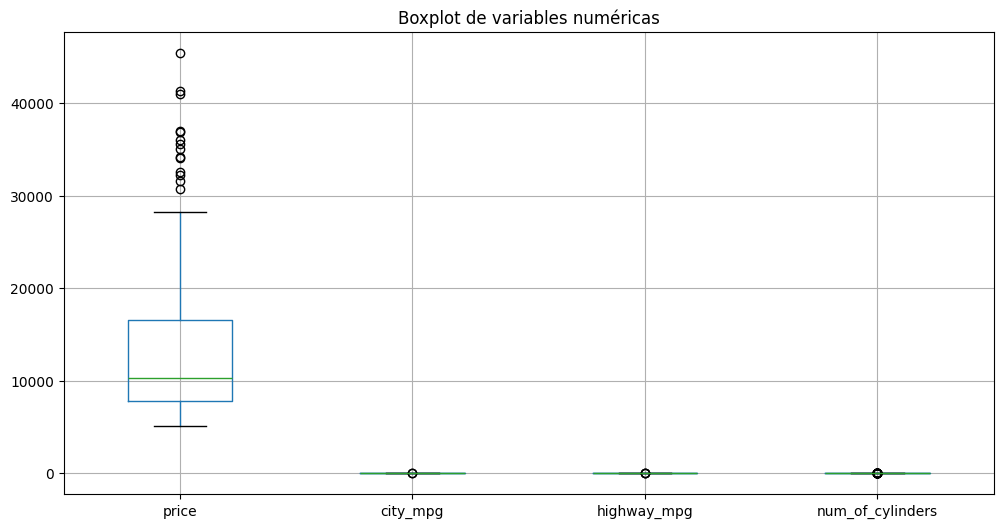


Outliers en price: 14 valores detectados

Outliers en city_mpg: 2 valores detectados

Outliers en highway_mpg: 3 valores detectados

Outliers en num_of_cylinders: 46 valores detectados

Tamaño original: 205 filas
Tamaño después de eliminar outliers: 158 filas


In [93]:
# 5. Visualización de Outliers
# Variables numéricas a evaluar
num_vars = ['price', 'city_mpg', 'highway_mpg', 'num_of_cylinders']

# Crear boxplots para visualizar outliers
plt.figure(figsize=(12, 6))
df_onequestion[num_vars].boxplot()
plt.title("Boxplot de variables numéricas")
plt.show()

# Función para detectar outliers con IQR
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Límites superior e inferior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    return outliers

# Aplicar la función a cada variable numérica
for var in num_vars:
    outliers = detectar_outliers(df_onequestion, var)
    print(f"\nOutliers en {var}: {len(outliers)} valores detectados")

# Opción: eliminar outliers
df_onequestion_clean = df_onequestion.copy()
for var in num_vars:
    Q1 = df_onequestion_clean[var].quantile(0.25)
    Q3 = df_onequestion_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_onequestion_clean = df_onequestion_clean[(df_onequestion_clean[var] >= lower_bound) & 
                                                (df_onequestion_clean[var] <= upper_bound)]

# Comparar tamaño antes y después
print(f"\nTamaño original: {df_onequestion.shape[0]} filas")
print(f"Tamaño después de eliminar outliers: {df_onequestion_clean.shape[0]} filas")


Resultado: Se eliminó un 22.93% de los datos, lo cual es aceptable porque está por debajo del 30%.

# 2️⃣ Exploración de Datos (EDA) (Siguiente paso)

1. Analizar la distribución de variables (histogramas, boxplots).
2. Identificar correlaciones (heatmaps, scatterplots).
3. Comparar variables con el objetivo (en este caso, el precio del vehículo).

1️⃣ Histograma de price → Para ver su distribución.

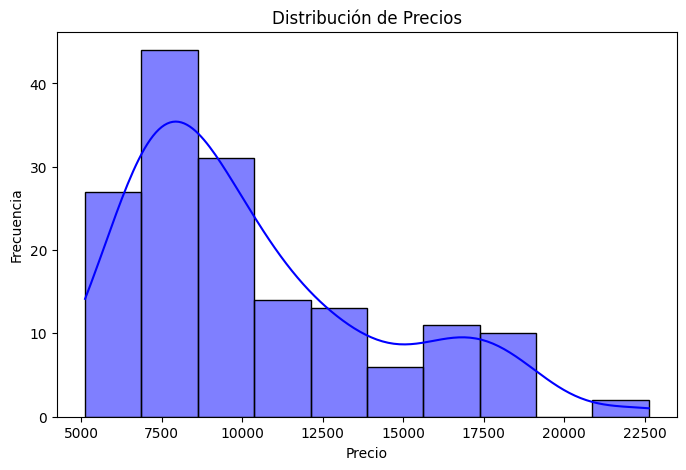

In [94]:
# 🔹 1️⃣ Histograma de precios
plt.figure(figsize=(8, 5))
sns.histplot(df_onequestion_clean['price'], bins=10, kde=True, color='blue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()



# Conclucion
2. La mayoría de los autos tienen precios en el rango de 5000 a 10000.
3. distribución es sesgada a la derecha, lo que indica que hay algunos autos con precios sgnificativamente más altos que el promedio 
4. Hay menos autos en el rango superior de precios, lo que sugiere que los autos más caros son menos comunes.

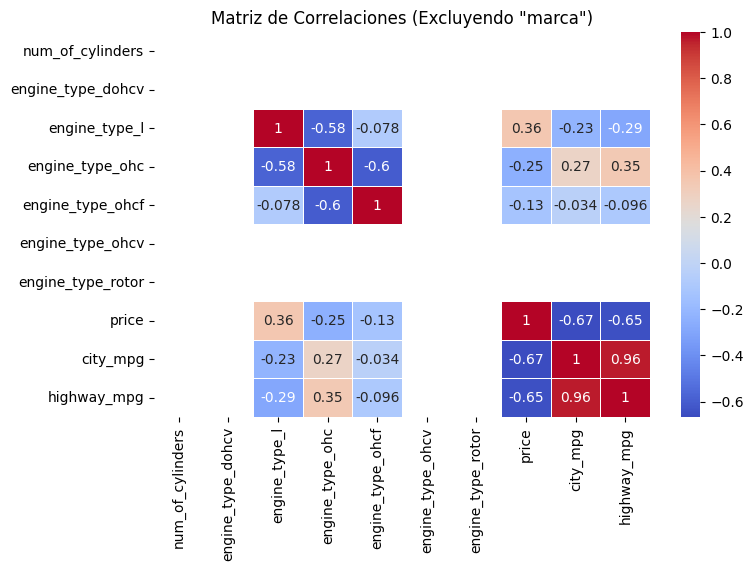

In [98]:
# 🔹 2️⃣ Heatmap de correlaciones
# Eliminar la columna 'marca' del DataFrame para calcular la correlación
df_sin_marca = df_onequestion_clean.drop('make', axis=1)

# Calcular la matriz de correlaciones
corr_matrix = df_sin_marca.corr()

# Crear el heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones (Excluyendo "marca")')
plt.show()



# Conculcion
 1. Hay una correlación negativa fuerte entre el precio y el consumo de gasolina (city_mpg y highway_mpg), lo que indica que los autos más caros tienden a consumir más combustible.
 2. El tipo de motor parece tener alguna relación con el precio y el número de cilindros.
 3. No hay una correlación extremadamente fuerte entre variables, lo que sugiere que el precio depende de múltiples factores en combinación.

C:\Users\josep\AppData\Local\Temp\ipykernel_14208\1162180500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_onequestion_clean['num_of_cylinders'].astype(str), y=df_onequestion_clean['price'], palette='Set2')


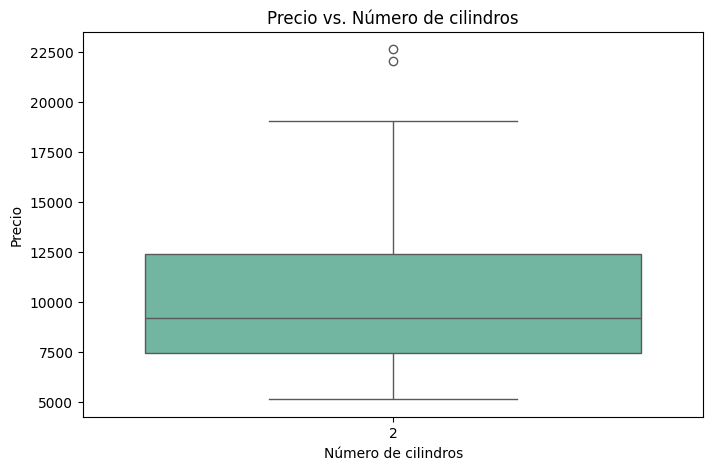

In [99]:
# 🔹 3️⃣ Boxplot: Precio vs. Número de cilindros
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_onequestion_clean['num_of_cylinders'].astype(str), y=df_onequestion_clean['price'], palette='Set2')
plt.title('Precio vs. Número de cilindros')
plt.xlabel('Número de cilindros')
plt.ylabel('Precio')
plt.show()



# Conclucion
1. Los coches con 2 cilindros tienden a ser más económicos en general.
2. Los autos con más cilindros tienden a ser más caros.
Existen algunos valores atípicos en autos con menor cantidad de cilindros, lo que podría indicar que hay modelos específicos más caros sin depender del número de cilindros.


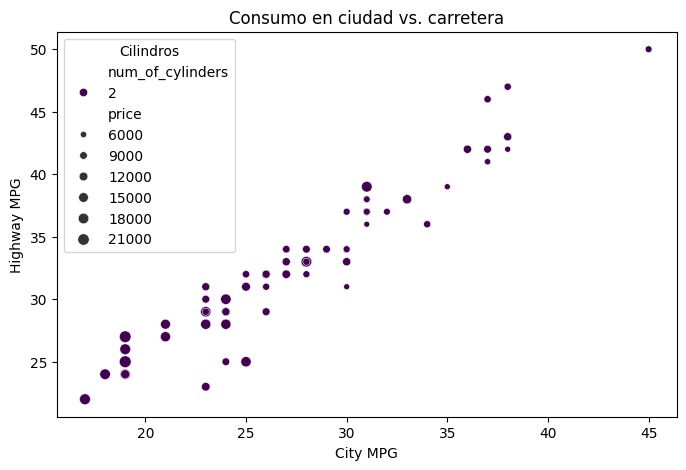

In [100]:
# 🔹 4️⃣ Relación entre city_mpg y highway_mpg
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_onequestion_clean['city_mpg'], y=df_onequestion_clean['highway_mpg'], hue=df_onequestion_clean['num_of_cylinders'], palette='viridis', size=df_onequestion_clean['price'])
plt.title('Consumo en ciudad vs. carretera')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.legend(title='Cilindros')
plt.show()

# Conclucion
1. Existe una relación lineal entre el consumo en ciudad y en carretera: los autos que son más eficientes en la ciudad también lo son en carretera.
2. No hay una gran dispersión, lo que sugiere que los valores de consumo se mantienen dentro de ciertos rangos dependiendo del tipo de vehículo.

## Conclusión General
1.  Los autos más caros suelen tener motores más grandes y menor eficiencia en combustible.
2.  La mayoría de los autos tienen precios en un rango medio-bajo, con pocos modelos en el extremo más alto.
3.  Hay una relación esperada entre el consumo en ciudad y carretera, lo que indica que no hay autos con diferencias extremas en estos valores.
4.  Para entender mejor el precio, habría que analizar más variables como marca, año y características del vehículo.

In [96]:
# Especificar la ruta y el nombre del archivo CSV
ruta_archivo = r"C:\Users\josep\OneDrive\Escritorio\Proyectos-Junior\Dash\Proyecto-Automobile\PrimeraSolicitud.csv" 

# Guardar el DataFrame en un archivo CSV
df_onequestion_clean.to_csv(ruta_archivo, index=False) # index=False evita guardar el índice del DataFrame

print(f"DataFrame guardado en: {ruta_archivo}")

DataFrame guardado en: C:\Users\josep\OneDrive\Escritorio\Proyectos-Junior\Dash\Proyecto-Automobile\PrimeraSolicitud.csv
